In [1]:
import os
from os import path
from matplotlib import pyplot as plt
import pandas as pd

In [8]:
snowfall = pd.read_csv('hw_data/Annual snowfall in Buffalo 19101972.csv')
df = snowfall.set_index("year number").sort_index()
df.head()

,x
year number,
1,126.4
2,82.4
3,78.1
4,51.1
5,90.9


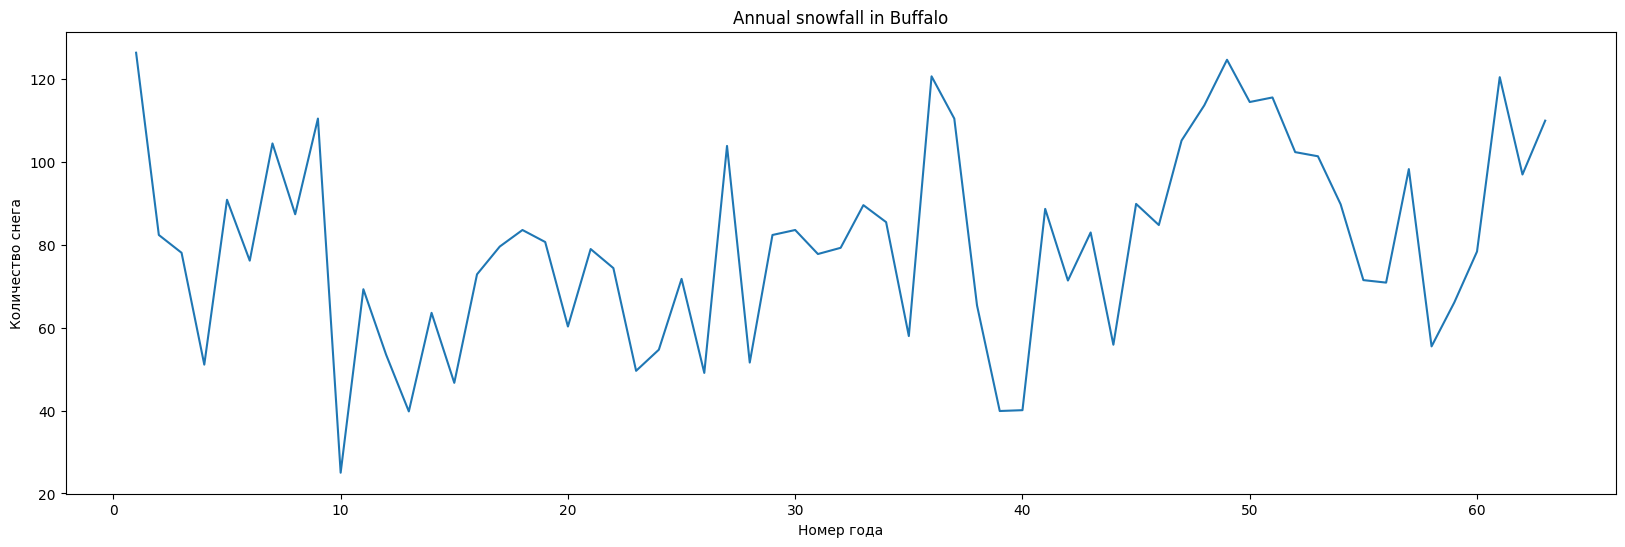

In [10]:
plt.figure(figsize = (20,6))
plt.plot(df)
plt.title('Annual snowfall in Buffalo')
plt.xlabel('Номер года')
plt.ylabel('Количество снега')
plt.show()

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [12]:
from pylab import rcParams
rcParams['figure.figsize'] = 11, 9

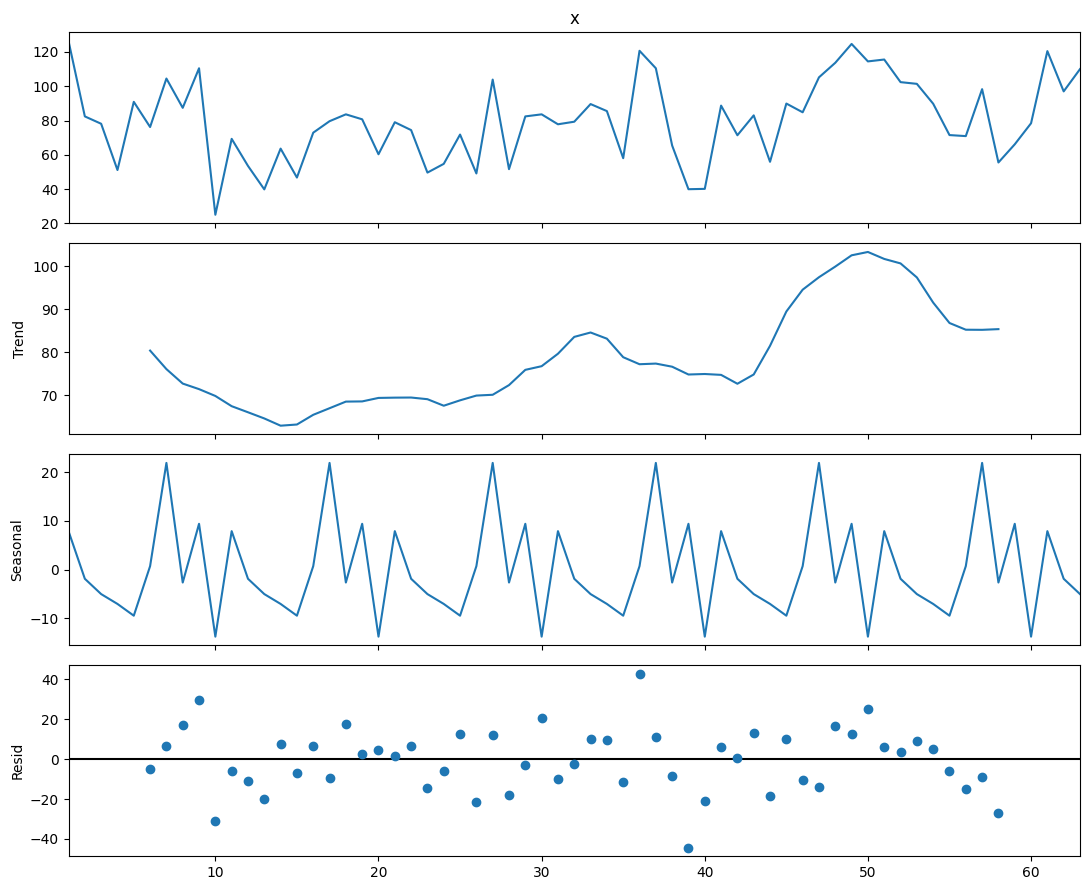

In [15]:
decompose = seasonal_decompose(df["x"], period=10)
decompose.plot()
plt.show()

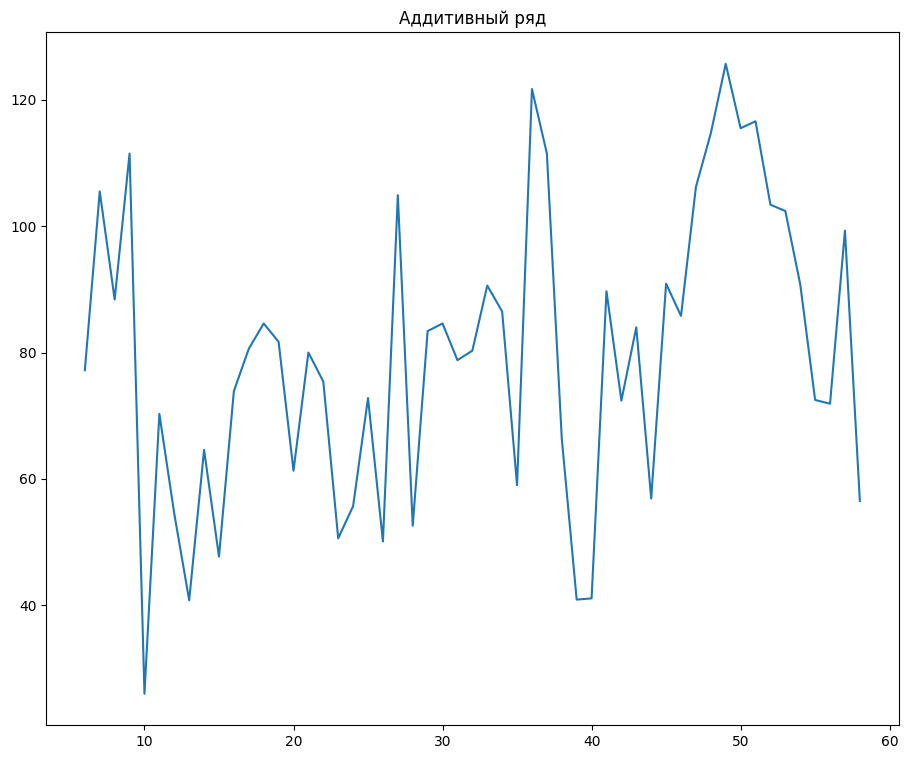

In [18]:
add_row = decompose.trend + decompose.seasonal + 1 + decompose.resid

plt.plot(add_row)
plt.title("Аддитивный ряд")
plt.show()

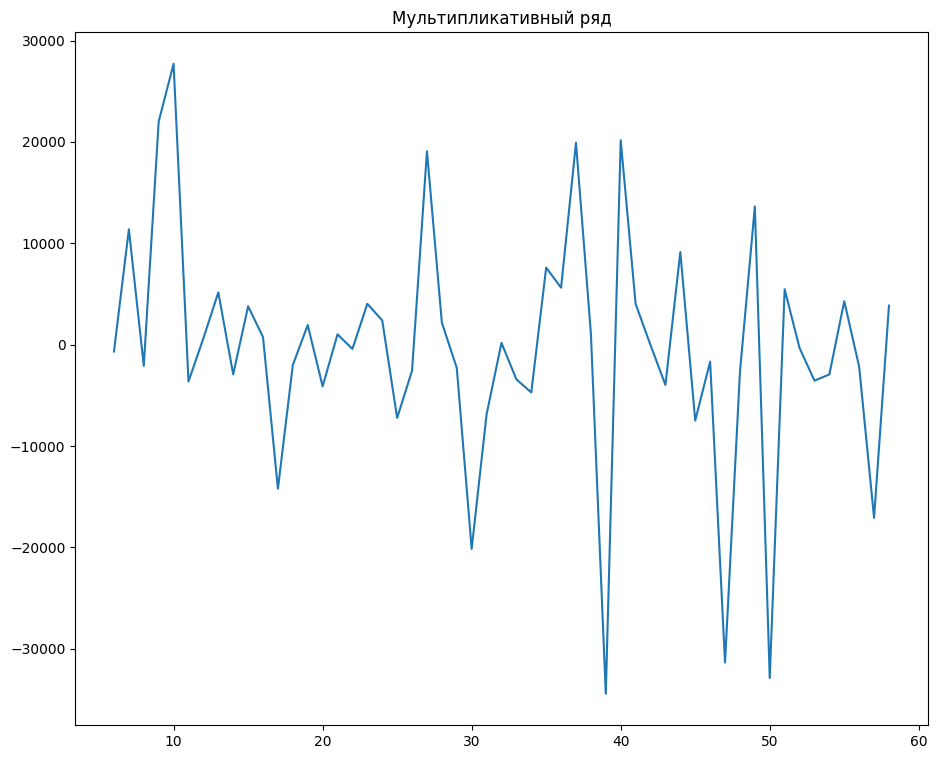

In [19]:
mult_row = decompose.trend * (decompose.seasonal + 1) * decompose.resid

plt.plot(mult_row)
plt.title("Мультипликативный ряд")
plt.show()

In [20]:
# Тестируем ряд на стационарность
from statsmodels.tsa.stattools import adfuller

In [21]:
alpha = 0.05
name = "Annual snowfall in Buffalo"
ts = df["x"]

print(f'Тест Дики-Фуллера ряда {name} :')
dftest = adfuller(ts, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

if dfoutput["p-value"] < alpha:
    print(f"Значение p меньше {alpha * 100}%. Ряд стационарный.")
else:
    print(f"Значение p больше {alpha*100}%. Ряд не стационарный.")

Тест Дики-Фуллера ряда Annual snowfall in Buffalo :
Test Statistic                -5.718539e+00
p-value                        7.028398e-07
#Lags Used                     0.000000e+00
Number of Observations Used    6.200000e+01
Critical Value (1%)           -3.540523e+00
Critical Value (5%)           -2.909427e+00
Critical Value (10%)          -2.592314e+00
dtype: float64
Значение p меньше 5.0%. Ряд стационарный.


In [22]:
# Автокорреляция и коррелограммы
import statsmodels.tsa.api as smt

<Figure size 1200x700 with 0 Axes>

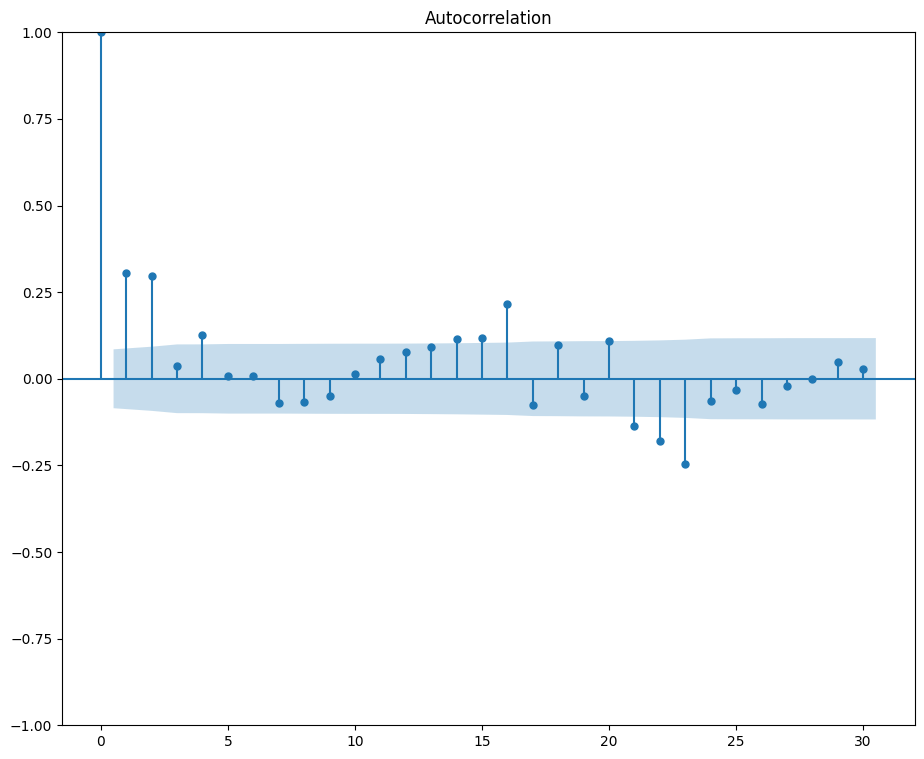

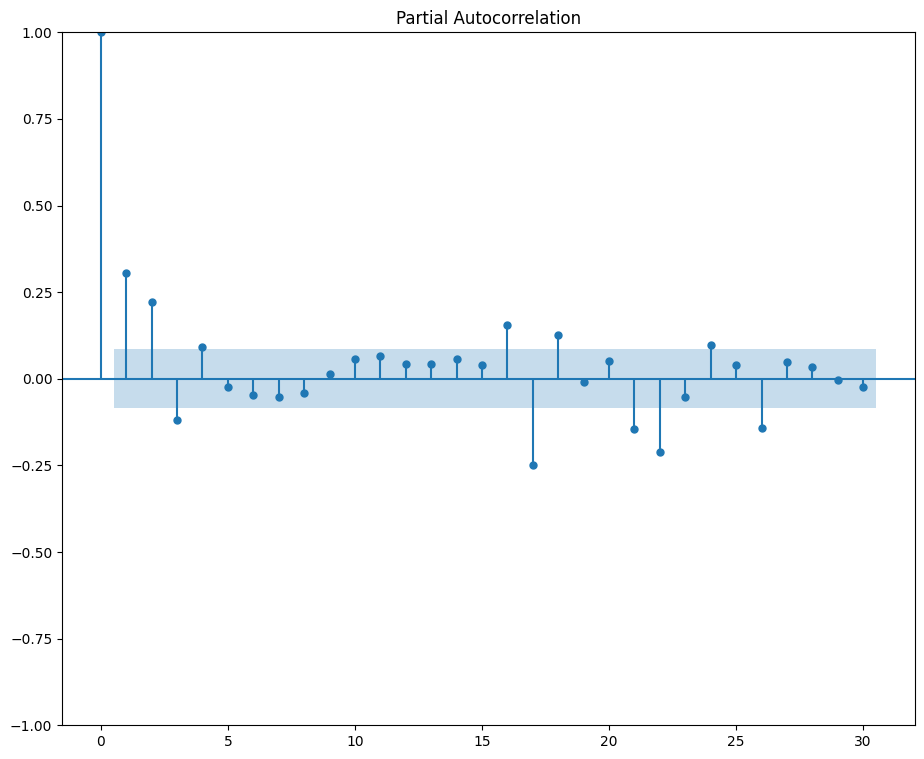

In [25]:
ts = df["x"]


fig = plt.figure(figsize=(12, 7))

ac_plot = smt.graphics.plot_acf(ts, lags=30, alpha=0.5)

pac_plot = smt.graphics.plot_pacf(ts, lags=30, alpha=0.5)

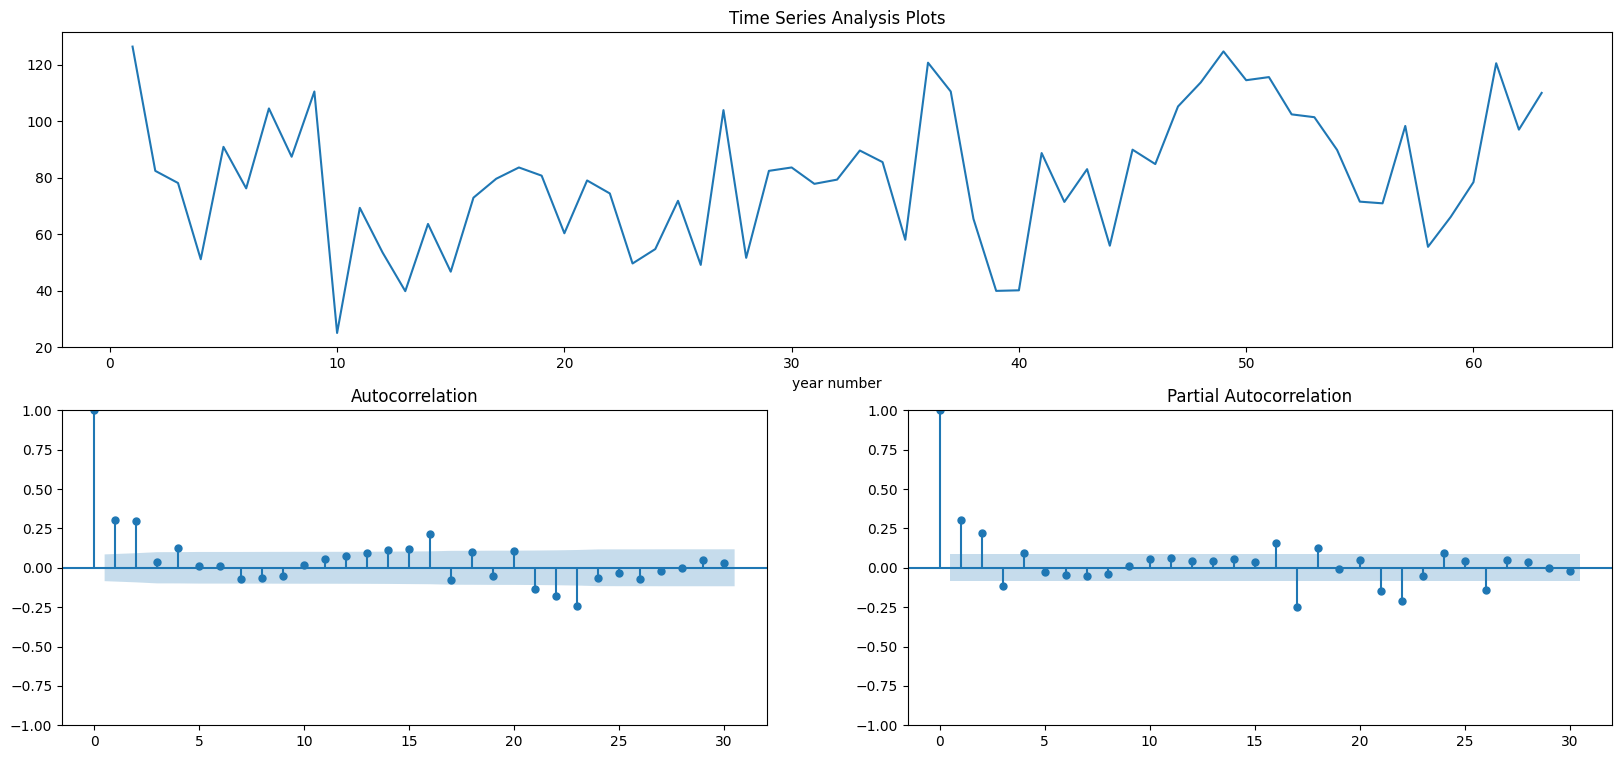

In [26]:
fig = plt.figure(figsize=(20, 9))
layout = (2, 2)
ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
acf_ax = plt.subplot2grid(layout, (1, 0))
pacf_ax = plt.subplot2grid(layout, (1, 1))

ts.plot(ax=ts_ax)
ts_ax.set_title('Time Series Analysis Plots')
smt.graphics.plot_acf(ts, lags=30, ax=acf_ax, alpha=0.5)
smt.graphics.plot_pacf(ts, lags=30, ax=pacf_ax, alpha=0.5)
None